In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Show basic structure
print(titanic_df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


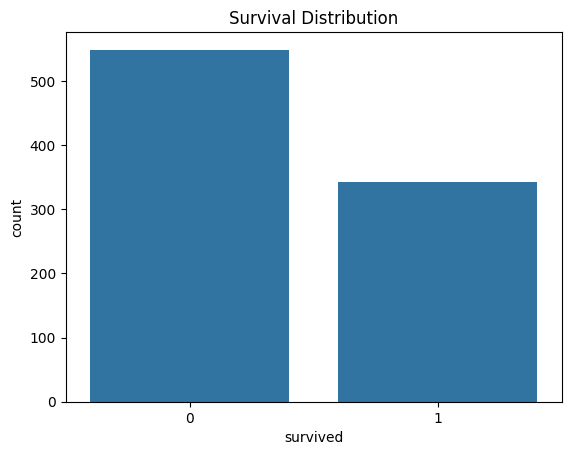

Survival Rate:
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [2]:
# Distribution of 'survived' column
sns.countplot(x='survived', data=titanic_df)
plt.title('Survival Distribution')
plt.show()

# Percentage of survivors
survival_rate = titanic_df['survived'].value_counts(normalize=True) * 100
print(f"Survival Rate:\n{survival_rate}")


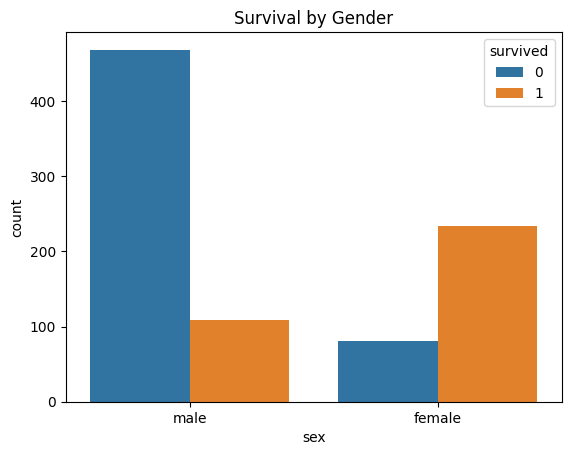

Survival Rate by Gender:
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


In [3]:
# Countplot for survival by gender
sns.countplot(x='sex', hue='survived', data=titanic_df)
plt.title('Survival by Gender')
plt.show()

# Calculate survival rate by gender
gender_survival = titanic_df.groupby('sex')['survived'].mean() * 100
print(f"Survival Rate by Gender:\n{gender_survival}")


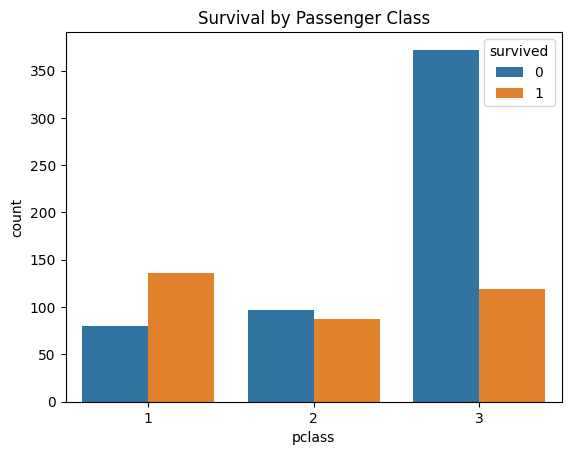

Survival Rate by Passenger Class:
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


In [4]:
# Countplot for survival by passenger class
sns.countplot(x='pclass', hue='survived', data=titanic_df)
plt.title('Survival by Passenger Class')
plt.show()

# Calculate survival rate by class
class_survival = titanic_df.groupby('pclass')['survived'].mean() * 100
print(f"Survival Rate by Passenger Class:\n{class_survival}")


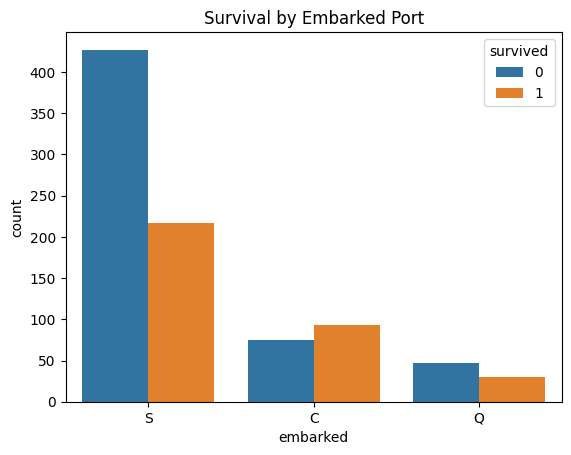

Survival Rate by Embarked Port:
embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64


In [5]:
# Countplot for survival by embarked location
sns.countplot(x='embarked', hue='survived', data=titanic_df)
plt.title('Survival by Embarked Port')
plt.show()

# Calculate survival rate by embarked port
embarked_survival = titanic_df.groupby('embarked')['survived'].mean() * 100
print(f"Survival Rate by Embarked Port:\n{embarked_survival}")


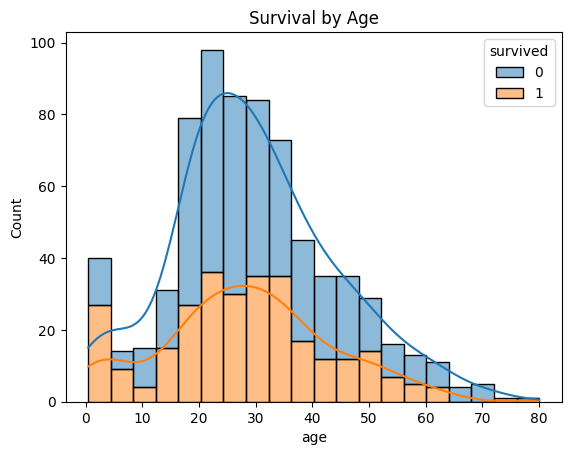

Mean Age of Survivors and Non-Survivors:
survived
0    30.626179
1    28.343690
Name: age, dtype: float64


In [6]:
# Age distribution of survivors vs. non-survivors
sns.histplot(data=titanic_df, x='age', hue='survived', multiple='stack', kde=True)
plt.title('Survival by Age')
plt.show()

# Calculate mean age of survivors vs. non-survivors
age_survival = titanic_df.groupby('survived')['age'].mean()
print(f"Mean Age of Survivors and Non-Survivors:\n{age_survival}")


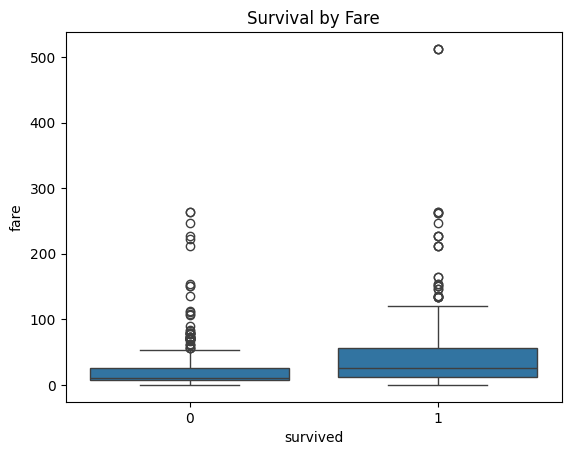

Mean Fare of Survivors and Non-Survivors:
survived
0    22.117887
1    48.395408
Name: fare, dtype: float64


In [7]:
# Boxplot of survival based on fare
sns.boxplot(x='survived', y='fare', data=titanic_df)
plt.title('Survival by Fare')
plt.show()

# Calculate mean fare of survivors vs. non-survivors
fare_survival = titanic_df.groupby('survived')['fare'].mean()
print(f"Mean Fare of Survivors and Non-Survivors:\n{fare_survival}")


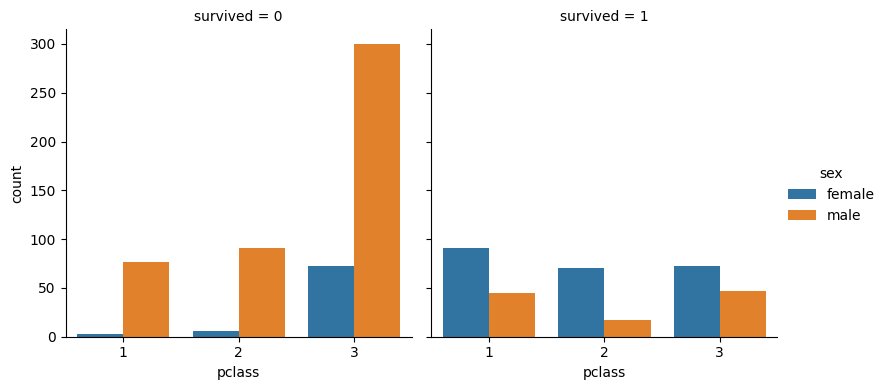

Survival Rate by Class and Gender:
pclass          1          2          3
sex                                    
female  96.808511  92.105263  50.000000
male    36.885246  15.740741  13.544669


In [8]:
# Countplot for survival by both class and gender
sns.catplot(x='pclass', hue='sex', col='survived', data=titanic_df, kind='count', height=4, aspect=1)
plt.show()

# Calculate survival rate by class and gender
class_gender_survival = titanic_df.pivot_table('survived', index='sex', columns='pclass', aggfunc='mean') * 100
print(f"Survival Rate by Class and Gender:\n{class_gender_survival}")


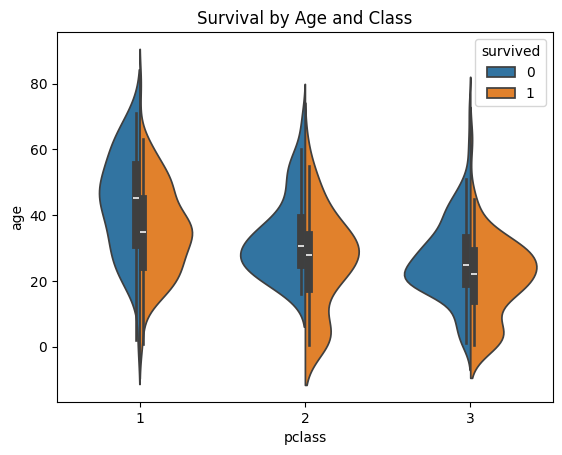

In [9]:
# Violin plot for survival by age, class, and gender
sns.violinplot(x='pclass', y='age', hue='survived', data=titanic_df, split=True)
plt.title('Survival by Age and Class')
plt.show()


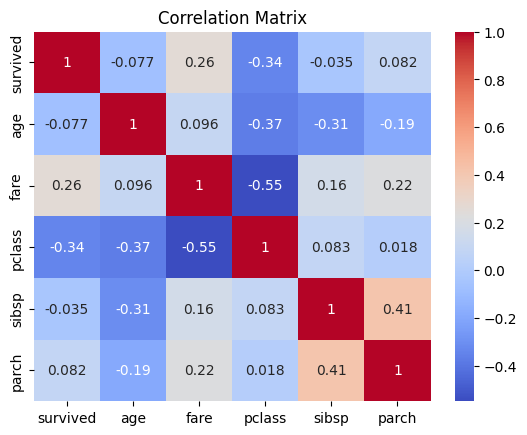

In [10]:
# Correlation matrix including survival
corr_matrix = titanic_df[['survived', 'age', 'fare', 'pclass', 'sibsp', 'parch']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Check for missing values
print(titanic_df.isnull().sum())

# Fill missing age with median age
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)

# Fill missing embarked with mode (most common port)
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)

# Verify if missing values are handled
print(titanic_df.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_8732\3219229777.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8732\3219229777.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 